<a href="https://colab.research.google.com/github/aarmin86/QuantumSimulation/blob/main/AhmadzadeML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
#from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# kf = KFold(n_splits=2)
data_raw = pd.read_csv("/content/exp_conAndResults_mathModel.csv")
# data_raw = data_raw.values

In [ ]:
input_labels = ['H1G1P', 'H1G2P', 'H2G1P',	'H2G2P',	'H1G1M',	'H1G2M',
          'H2G1M',	'H2G2M',	'H1G1BW',	'H1G2BW',	'H2G1BW',	'H2G2BW',
          'H1G1U',	'H1G2U',	'H2G1U',	'H2G2U']

In [ ]:
data_raw.iloc[1]['Time.1']

6580.482764

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
#from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
import random
import matplotlib.pyplot as plt

class ArminDataset(torch.utils.data.Dataset):

  def __init__(self, data):
    self.data = data

  def __len__(self):
      return len(self.data)

  def __getitem__(self, i):
      configID = self.data.iloc[i]['ConfigID']
      y = self.data.iloc[i]['Time']
      x = []
      for label in input_labels:
        x.append(self.data.iloc[i][label])
      x = np.array(x)
      x = x/np.array([12000,12000,12000,12000,12,12,12,12,500,500,500,500,1,1,1,1])
      y = y/12000
      id = self.data.iloc[i]['Unnamed: 0']
      math_y = self.data.iloc[i]['Time.1']

      return id,x, y, math_y, configID


device = "cpu"
class MLP(nn.Module):
  '''
    Multilayer Perceptron for regression.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(16, 1)
    )


  def forward(self, x):
    '''
      Forward pass
    '''
    return self.layers(x)

In [ ]:
# kf = KFold(n_splits=2)
data_raw = pd.read_csv("/content/exp_conAndResults_mathModel.csv")
# data_raw = data_raw.values

In [ ]:
data_raw[1270:]

In [ ]:
data_raw[data_raw['ConfigID']!=0]

In [ ]:
import pandas as pd

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Training process has finished.


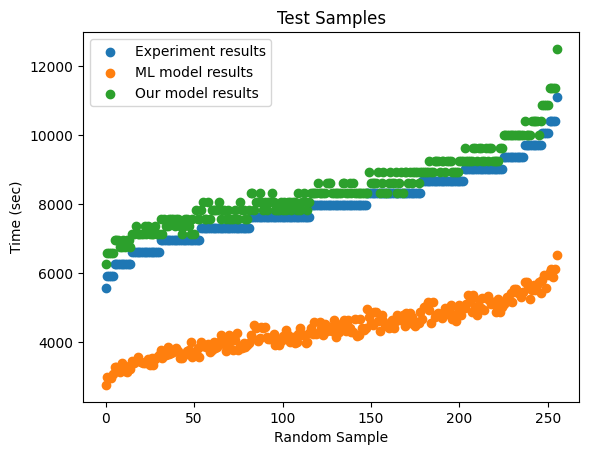

Test loss= 3587.5302823260427
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Training process has finished.


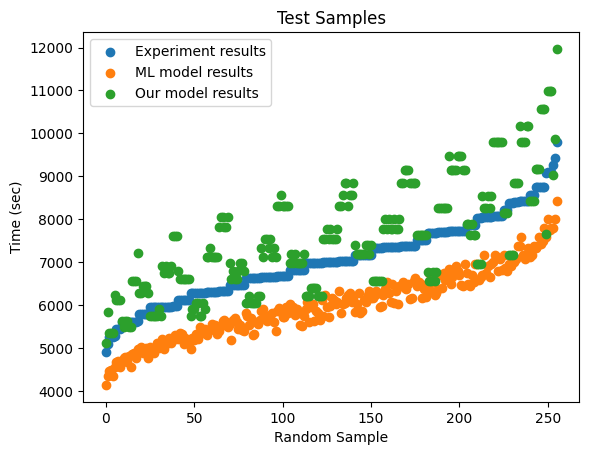

Test loss= 1030.8953141793609
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Training process has finished.


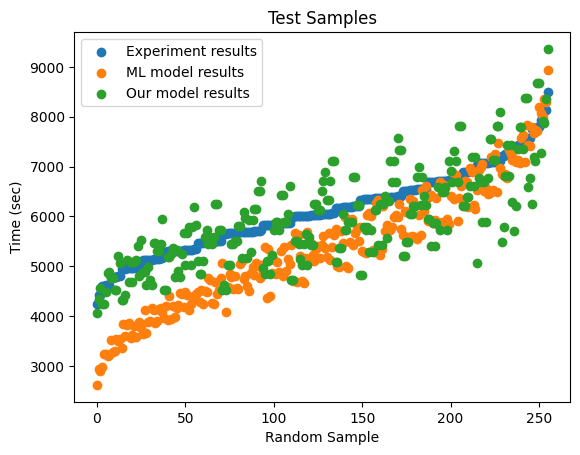

Test loss= 753.0854574870318
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Training process has finished.


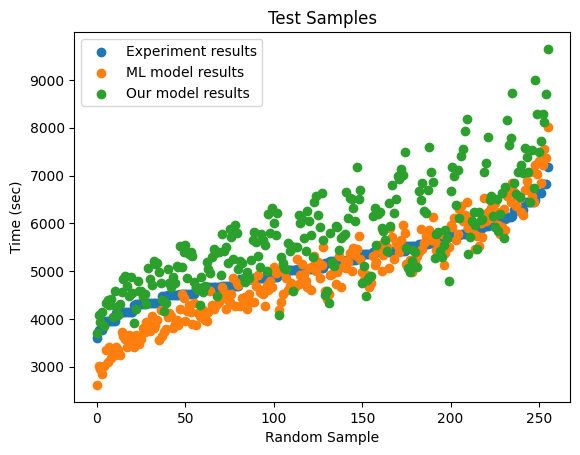

Test loss= 361.5834347438067
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Training process has finished.


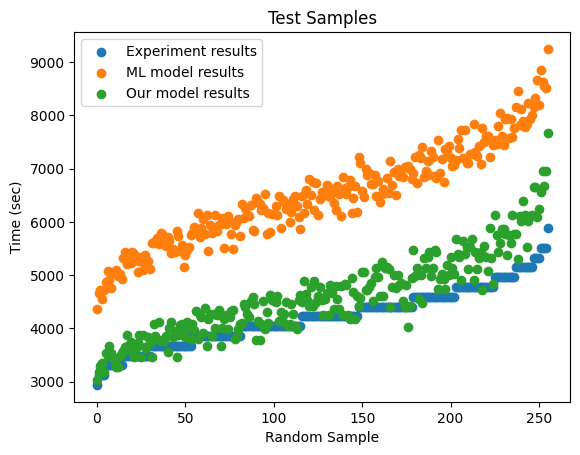

Test loss= 2274.0663844160736


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:
for cfg_i in range(6):
  results = []
  ##############
  ##Train######
  ##############
  for exp_i in range(1):
    data_raw = data_raw.sample(frac=1).reset_index(drop=True)
    # test_data = data_raw[:256]
    # train_data = data_raw[256:]
    test_data = data_raw[data_raw['ConfigID']==cfg_i]
    train_data = data_raw[data_raw['ConfigID']!=cfg_i]

    dataset = ArminDataset(train_data)
    trainloader = torch.utils.data.DataLoader(dataset, batch_size=2, shuffle=True, num_workers=1)

    dataset_test = ArminDataset(test_data)
    testloader = torch.utils.data.DataLoader(dataset_test, batch_size=2, shuffle=True, num_workers=1)

    # Initialize the MLP
    mlp = MLP()
    mlp = mlp.to(device)
    # Define the loss function and optimizer
    loss_function = nn.L1Loss()
    optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-4)


    # Run the training loop
    for epoch in range(0, 25): # 5 epochs at maximum
      # Print epoch
      print(f'Starting epoch {epoch+1}')

      # Set current loss value
      current_loss = 0.0

      # Iterate over the DataLoader for training data
      for train_i, data in enumerate(trainloader, 0):

          # Get and prepare inputs
          id,inputs, targets, math_targets, _ = data
          inputs, targets = inputs.float(), targets.float()
          targets = targets.reshape((targets.shape[0], 1))

          inputs = torch.Tensor(inputs)
          targets = torch.Tensor(targets)
          inputs = inputs.to(device)
          targets = targets.to(device)
          # Zero the gradients
          optimizer.zero_grad()

          # Perform forward pass
          outputs = mlp(inputs)

          # Compute loss
          loss = loss_function(outputs, targets)

          # Perform backward pass
          loss.backward()

          # Perform optimization
          optimizer.step()

          # Print statistics
          current_loss += loss.item()
          # if i % 10 == 0:
          #     print('Loss after mini-batch %5d: %.3f' %
          #         (i + 1, current_loss / 500))
          #     current_loss = 0.0

        # Process is complete.
    print('Training process has finished.')
  #########
  ##Test##
  #########
  mlp.eval()
  current_loss_test = 0.0
  outputs_list = {0:[],
                  1:[],
                  2:[],
                  3:[],
                  4:[]}
  output_all = []
  for test_i, data in enumerate(testloader):

      # Get and prepare inputs
      id,inputs, targets, math_targets, config_id = data
      inputs, targets = inputs.float(), targets.float()
      targets = targets.reshape((targets.shape[0], 1))

      inputs = torch.Tensor(inputs)
      targets = torch.Tensor(targets)
      inputs = inputs.to(device)
      targets = targets.to(device)
      # Zero the gradients
      with torch.no_grad():
        # Perform forward pass
        outputs = mlp(inputs)

      # print(id)
      for oid in range(len(outputs)):
        cfg = int(config_id[oid].cpu().numpy())
        trg = targets[oid][0].cpu().numpy()
        out = outputs[oid][0].detach().cpu().numpy()
        mth = math_targets[oid].cpu().numpy()
        outputs_list[cfg].append((int(trg*12000), int(out*12000), mth))
        output_all.append((int(trg*12000), int(out*12000), mth))
      # Compute loss
      loss = loss_function(outputs, targets)


      # Print statistics
      current_loss_test += loss.item()

  ##########
  ##Draw Graphs##
  ###############
  output_all.sort(key = lambda x: x[0])
  m = []
  n = []
  o = []
  p = []
  for i, item in enumerate(output_all):
    m.append(item[0])
    n.append(item[1])
    o.append(item[2])
    p.append(i)

  plt.title("Test Samples")
  plt.scatter(p,m,  label="Experiment results")
  plt.scatter(p,n,  label="ML model results")
  plt.scatter(p,o,  label="Our model results")

  plt.xlabel("Random Sample", fontsize=10)
  plt.ylabel("Time (sec)", fontsize=10)
  # plt.title("Sigma = 0.5")
  plt.legend()
  plt.savefig('testset'+str(cfg_i)+'.jpg', dpi = 600)
  plt.show()
  # Process is complete.
  results.append((current_loss_test/128)*12000)
  print('Test loss=' , (current_loss_test/128)*12000)



  data = pd.DataFrame({
    "target": m,
    "ml": n,
    "math":o
  })
  data.to_excel("testset_cfg"+str(cfg_i)+".xlsx")

In [ ]:
mlp.eval()
current_loss_test = 0.0
outputs_list = {0:[],
                1:[],
                2:[],
                3:[],
                4:[]}
output_all = []
for test_i, data in enumerate(testloader):

    # Get and prepare inputs
    id,inputs, targets, math_targets, config_id = data
    inputs, targets = inputs.float(), targets.float()
    targets = targets.reshape((targets.shape[0], 1))

    inputs = torch.Tensor(inputs)
    targets = torch.Tensor(targets)
    inputs = inputs.to(device)
    targets = targets.to(device)
    # Zero the gradients
    with torch.no_grad():
      # Perform forward pass
      outputs = mlp(inputs)

    # print(id)
    for oid in range(len(outputs)):
      cfg = int(config_id[oid].cpu().numpy())
      trg = targets[oid][0].cpu().numpy()
      out = outputs[oid][0].detach().cpu().numpy()
      mth = math_targets[oid].cpu().numpy()
      outputs_list[cfg].append((int(trg*12000), int(out*12000), mth))
      output_all.append((int(trg*12000), int(out*12000), mth))
    # Compute loss
    loss = loss_function(outputs, targets)


    # Print statistics
    current_loss_test += loss.item()


In [ ]:
len(outputs)

In [ ]:
float(trg)

In [ ]:
# import torch

In [ ]:
torch.save(mlp.state_dict(), "mlp.pth")

In [ ]:
# # m=targets n=outputs o=math_targets
# plt.plot(p,m, label="Experiment results")
# plt.plot(p,n, label="ML model results")
# plt.plot(p,o, label="Our model results")
# plt.xlabel("Random Sample", fontsize=10)
# plt.ylabel("Time (sec)", fontsize=10)
# # plt.title("Sigma = 0.5")
# plt.legend()
# plt.savefig('plotimg.jpg', dpi = 600)
# plt.show()

In [ ]:
m = []
n = []
o = []
p = []
cfg_idx = 4
for i,output_item in enumerate(outputs_list[cfg_idx][:10]):
  m.append(output_item[0]*12000)
  n.append(output_item[1]*12000)
  o.append(output_item[2])
  p.append(i)


barWidth = 0.25
br1 = p
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

plt.title("CFG "+str(cfg_idx))
plt.bar(br1,m, width = barWidth, edgecolor ='grey', label="Experiment results")
# plt.scatter(br1,m,  label="Experiment results")
# plt.scatter(br1,n,  label="Experiment results")
# plt.scatter(br1,o,  label="Experiment results")
plt.bar(br2,o, width = barWidth, edgecolor ='grey', label="Our model results")
plt.bar(br3,n, width = barWidth, edgecolor ='grey', label="ML model results")

plt.xlabel("Random Sample", fontsize=10)
plt.ylabel("Time (sec)", fontsize=10)
# plt.title("Sigma = 0.5")
plt.legend()
plt.savefig('cfg'+str(cfg_idx)+'.jpg', dpi = 600)
plt.show()
# Process is complete.
results.append((current_loss_test/128)*12000)
print('Test loss=' , (current_loss_test/128)*12000)


In [ ]:
output_all = outputs_list[3]

In [ ]:
# output_all = dict(sorted(output_all.items()))
output_all.sort(key = lambda x: x[0])

In [ ]:
m = []
n = []
o = []
p = []
for i, item in enumerate(output_all):
  m.append(item[0])
  n.append(item[1])
  o.append(item[2])
  p.append(i)

plt.title("Test Samples")
plt.scatter(p,m,  label="Experiment results")
plt.scatter(p,n,  label="ML model results")
plt.scatter(p,o,  label="Our model results")

plt.xlabel("Random Sample", fontsize=10)
plt.ylabel("Time (sec)", fontsize=10)
# plt.title("Sigma = 0.5")
plt.legend()
plt.savefig('testset.jpg', dpi = 600)
plt.show()
# Process is complete.
results.append((current_loss_test/128)*12000)
print('Test loss=' , (current_loss_test/128)*12000)


In [ ]:
import pandas as pd

data = pd.DataFrame({
  "target": m,
  "ml": n,
  "math":o
})

In [ ]:
data.to_excel("testset_cfg3.xlsx")

In [ ]:
data_raw['ConfigID']